In [409]:
import copy
import pandas as pd
import numpy as np
import scipy.stats as stats

# Requests sends and recieves HTTP requests.
import requests

# Beautiful Soup parses HTML documents in python.
from bs4 import BeautifulSoup

import re

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
%matplotlib inline

plt.style.use('ggplot')

In [785]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [373]:
recipe_url = 'https://www.epicurious.com/search?page=862&sort=mostReviewed'
r = requests.get(recipe_url)

In [374]:
r.status_code

200

In [868]:
from pymongo import MongoClient
client = MongoClient('localhost', 27017)

# Access/Initiate Database
recipe_db = client.recipe_database

# Access/Initiate Table
recipes_table = recipe_db.recipes_table

In [869]:
recipes = recipes_table.find()
recipe_table = pd.DataFrame(list(recipes))
recipe_table.shape

(33102, 83)

In [680]:
recipe_table.columns

Index(['', 'Calories', 'Carbohydrates', 'Cholesterol', 'Fat', 'Fiber',
       'Ingredient #1', 'Ingredient #10', 'Ingredient #11', 'Ingredient #12',
       'Ingredient #13', 'Ingredient #14', 'Ingredient #15', 'Ingredient #16',
       'Ingredient #17', 'Ingredient #18', 'Ingredient #19', 'Ingredient #2',
       'Ingredient #20', 'Ingredient #21', 'Ingredient #22', 'Ingredient #23',
       'Ingredient #24', 'Ingredient #25', 'Ingredient #26', 'Ingredient #27',
       'Ingredient #28', 'Ingredient #29', 'Ingredient #3', 'Ingredient #4',
       'Ingredient #5', 'Ingredient #6', 'Ingredient #7', 'Ingredient #8',
       'Ingredient #9', 'Make_Again', 'Monounsaturated Fat',
       'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 'Saturated Fat',
       'Sodium', 'Tag #1', 'Tag #10', 'Tag #11', 'Tag #12', 'Tag #13',
       'Tag #14', 'Tag #15', 'Tag #16', 'Tag #17', 'Tag #18', 'Tag #19',
       'Tag #2', 'Tag #20', 'Tag #21', 'Tag #22', 'Tag #23', 'Tag #24',
       'Tag #25', 'Tag #26',

In [501]:
#extract all recipes with 'Winter' tag
def find_winter(x):
    col='Tag #'
    for _ in range(1,39):
        if x[col+str(_)]=='Winter': return True
    return False
         
mask = recipe_table.apply(find_winter,axis=1)
#print(mask)

Winter = recipe_table[mask]

winter_nutrition = Winter[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]


In [502]:
#extract all recipes with 'Winter' tag
def find_summer(x):
    col='Tag #'
    for _ in range(1,39):
        if x[col+str(_)]=='Summer': return True
    return False
         
mask = recipe_table.apply(find_summer,axis=1)
#print(mask)

Summer = recipe_table[mask]


summer_nutrition = Summer[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]

In [728]:
all_nutrition = recipe_table[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id','Ingredient #1', 'Ingredient #10', 'Ingredient #11', 'Ingredient #12',
       'Ingredient #13', 'Ingredient #14', 'Ingredient #15', 'Ingredient #16',
       'Ingredient #17', 'Ingredient #18', 'Ingredient #19', 'Ingredient #2',
       'Ingredient #20', 'Ingredient #21', 'Ingredient #22', 'Ingredient #23',
       'Ingredient #24', 'Ingredient #25', 'Ingredient #26', 'Ingredient #27',
       'Ingredient #28', 'Ingredient #29', 'Ingredient #3', 'Ingredient #4',
       'Ingredient #5', 'Ingredient #6', 'Ingredient #7', 'Ingredient #8',
       'Ingredient #9']]

In [729]:
#data cleaning
def get_val(x):
    return str(x).split(' ')[0]
# def get_perc(x):
#     return str(x.split(' ')[1])[2:-2]

colz = ['Carbohydrates', 'Cholesterol', 'Fat', 'Fiber', 'Protein',
       'Saturated Fat', 'Sodium']
valcolz = [x[:3] + '_val' for x in colz]
percolz = [x[:3] + '_perc' for x in colz]

for i,x in enumerate(colz):
    winter_nutrition[valcolz[i]] = winter_nutrition[x].dropna().apply(get_val)
#     rn[percolz[i]] = rn[x].dropna().apply(get_perc)
    
for i,x in enumerate(colz):
    summer_nutrition[valcolz[i]] = summer_nutrition[x].dropna().apply(get_val)
#     rna[percolz[i]] = rna[x].dropna().apply(get_perc)

for i,x in enumerate(colz):
    all_nutrition[valcolz[i]] = all_nutrition[x].dropna().apply(get_val)

summer_nutrition['Make_Again#'] = summer_nutrition['Make_Again'].apply(lambda x: x.strip('%'))
winter_nutrition['Make_Again#'] = winter_nutrition['Make_Again'].apply(lambda x: x.strip('%'))
all_nutrition['Make_Again#'] = all_nutrition['Make_Again'].apply(lambda x: x.strip('%'))



/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [718]:
# summer_nutrition.head()

In [730]:
summer_nutritions = summer_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)
winter_nutritions = winter_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)
all_nutritions = all_nutrition[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)

summer_nutritions['score'] = summer_nutritions['Rating'] * summer_nutritions['Reviews'] * summer_nutritions['Make_Again#']/100

winter_nutritions['score'] = winter_nutritions['Rating'] * winter_nutritions['Reviews'] * winter_nutritions['Make_Again#']/100

all_nutritions['score'] = all_nutritions['Rating'] * all_nutritions['Reviews'] * all_nutritions['Make_Again#']/100



In [880]:
16486/6

2747.6666666666665

In [879]:
recipe_table.iloc[11934].dropna()

Calories                                                           16486
Carbohydrates                                                   26 g(9%)
Cholesterol                                               3192 mg(1064%)
Fat                                                        1528 g(2350%)
Fiber                                                           9 g(37%)
Ingredient #1                                       1 cup dry white wine
Ingredient #2                                3 tablespoons minced garlic
Ingredient #3                                2 tablespoons Dijon mustard
Ingredient #4                        1 teaspoon dried crushed red pepper
Ingredient #5          18 3-to-4 inch pieces meaty beef chuck short ribs
Make_Again                                                           79%
Monounsaturated Fat                                                692 g
Polyunsaturated Fat                                                 56 g
Protein                                            

In [735]:
def find_toofat(x):
    if x['Calories']<2800 and x['Fat_val']<93: return True
    return False
         
mask = all_nutritions.apply(find_toofat,axis=1)
#print(mask)

all_nutritions_no_fat = all_nutritions[mask]

# all_nutritions_no_fat
# 24146x12

Calories                                                             983
Carbohydrates                                                    3 g(1%)
Cholesterol                                                  204 mg(68%)
Fat                                                           92 g(142%)
Fiber                                                            1 g(3%)
Ingredient #1                                             1 garlic clove
Ingredient #2          1/4 cup chopped sun-dried tomatoes packed in o...
Ingredient #3                                            1/2 cup walnuts
Ingredient #4                              1/4 teaspoon ground coriander
Ingredient #5                                       1/4 teaspoon cayenne
Ingredient #6                     1 tablespoon chopped flat-leaf parsley
Ingredient #7                                  1/2 stick unsalted butter
Ingredient #8                             1/2 teaspoon fresh lemon juice
Ingredient #9                8 rib lamb chops (3/4 

In [876]:
all_nutritions_no_fat.sort_values('Fat_val', ascending=False)

,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
9999,983.0,94,4.0,19,3.0,204.0,92.0,1.0,34.0,42.0,138.0,71.440
22205,1590.0,60,2.5,6,161.0,549.0,92.0,8.0,35.0,44.0,598.0,9.000
2156,1207.0,83,3.0,65,25.0,286.0,92.0,4.0,68.0,38.0,688.0,161.850
772,1361.0,82,3.0,110,7.0,434.0,92.0,3.0,127.0,39.0,653.0,270.600
5731,1062.0,87,3.0,33,41.0,64.0,92.0,9.0,27.0,10.0,405.0,86.130
25071,842.0,100,2.5,4,7.0,5.0,92.0,3.0,4.0,13.0,1973.0,10.000
10898,1691.0,94,3.0,17,168.0,129.0,92.0,10.0,45.0,30.0,1476.0,47.940
11802,1025.0,94,3.5,16,11.0,209.0,92.0,1.0,36.0,43.0,537.0,52.640
6490,1232.0,81,4.0,29,4.0,362.0,92.0,0.0,88.0,32.0,336.0,93.960
20319,975.0,100,3.0,7,2.0,173.0,92.0,0.0,33.0,36.0,129.0,21.000


# SUGAR

In [737]:
#extract all recipes with 'Winter' tag
def find_sugar(x):
    col='Ingredient #'
    for _ in range(1,29):
        for i in str(x[col+str(_)]).split(' '):
            if i=='sugar' or i == 'Sugar': return True
    return False
         
mask = recipe_table.apply(find_sugar,axis=1)
#print(mask)
sugar = recipe_table[mask]


#extract all recipes with 'Winter' tag
def find_not_sugar(x):
    col='Ingredient #'
    for _ in range(1,29):
        for i in str(x[col+str(_)]).split(' '):
            if i=='sugar' or i == 'Sugar': return False
    return True
         
mask = recipe_table.apply(find_not_sugar,axis=1)
#print(mask)
no_sugar = recipe_table[mask]



In [708]:
not_sugar.iloc[2].dropna()

Calories                                                            1356
Carbohydrates                                                  68 g(23%)
Cholesterol                                                 373 mg(124%)
Fat                                                           86 g(133%)
Fiber                                                           5 g(20%)
Ingredient #1          1 2 1/2-pound piece beef tenderloin, well trim...
Ingredient #2                                2 tablespoons vegetable oil
Make_Again                                                           91%
Monounsaturated Fat                                                 34 g
Polyunsaturated Fat                                                  6 g
Protein                                                       72 g(145%)
Rating                                                               3.5
Reviews                                                              501
Saturated Fat                                      

In [710]:
# not_sugar[['Ingredient #1', 'Ingredient #10', 'Ingredient #11', 'Ingredient #12',
#        'Ingredient #13', 'Ingredient #14', 'Ingredient #15', 'Ingredient #16',
#        'Ingredient #17', 'Ingredient #18', 'Ingredient #19', 'Ingredient #2',
#        'Ingredient #20', 'Ingredient #21', 'Ingredient #22', 'Ingredient #23',
#        'Ingredient #24', 'Ingredient #25', 'Ingredient #26', 'Ingredient #27',
#        'Ingredient #28', 'Ingredient #29', 'Ingredient #3', 'Ingredient #4',
#        'Ingredient #5', 'Ingredient #6', 'Ingredient #7', 'Ingredient #8',
#        'Ingredient #9']]

In [711]:
# sugar[['Ingredient #1', 'Ingredient #10', 'Ingredient #11', 'Ingredient #12',
#        'Ingredient #13', 'Ingredient #14', 'Ingredient #15', 'Ingredient #16',
#        'Ingredient #17', 'Ingredient #18', 'Ingredient #19', 'Ingredient #2',
#        'Ingredient #20', 'Ingredient #21', 'Ingredient #22', 'Ingredient #23',
#        'Ingredient #24', 'Ingredient #25', 'Ingredient #26', 'Ingredient #27',
#        'Ingredient #28', 'Ingredient #29', 'Ingredient #3', 'Ingredient #4',
#        'Ingredient #5', 'Ingredient #6', 'Ingredient #7', 'Ingredient #8',
#        'Ingredient #9']]

In [714]:
sugar_yes = sugar[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]

In [715]:
sugar_no = not_sugar[['Calories', 'Carbohydrates', 'Cholesterol', 
                           'Fat', 'Fiber','Make_Again', 'Monounsaturated Fat',
                           'Polyunsaturated Fat', 'Protein', 'Rating', 'Reviews', 
                           'Saturated Fat', 'Sodium', 'Title', '_id']]

In [719]:
sugar_no = sugar_no[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)
sugar_yes = sugar_yes[['Calories', 'Make_Again#', 'Rating', 'Reviews',
                                      'Car_val', 'Cho_val', 'Fat_val', 'Fib_val', 'Pro_val', 
                                      'Sat_val', 'Sod_val']].apply(pd.to_numeric)


sugar_no['score'] = sugar_no['Rating'] * sugar_no['Reviews'] * sugar_no['Make_Again#']/100

sugar_yes['score'] = sugar_yes['Rating'] * sugar_yes['Reviews'] * sugar_yes['Make_Again#']/100





In [744]:
# sugar_yes

In [740]:
def find_toofat(x):
    if x['Calories']<2800 and x['Fat_val']<93: return True
    return False
         
mask = sugar_yes.apply(find_toofat,axis=1)
#print(mask)

sugary = sugar_yes[mask]


mask = sugar_no.apply(find_toofat,axis=1)
#print(mask)

sugarn = sugar_no[mask]

In [766]:
sugary1 = sugary.dropna()
sugarn1= sugarn.dropna()

In [949]:
print(sugary1.shape)
print(sugarn1.shape)

(5852, 12)
(13146, 12)


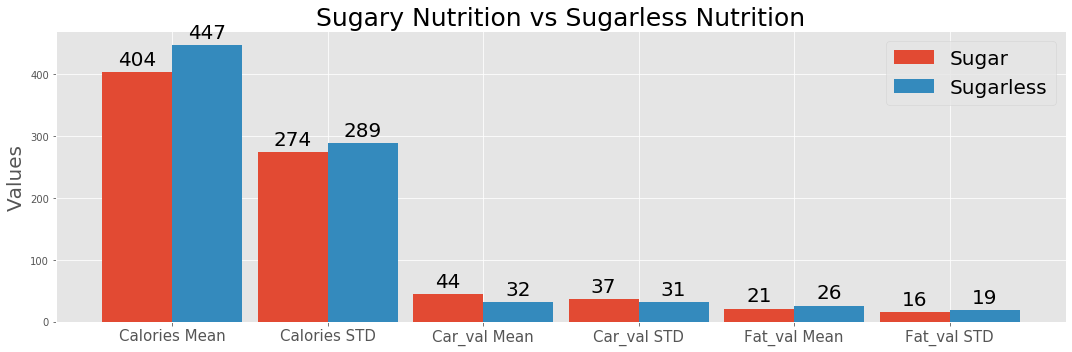

In [979]:
nutrition_list = ['Calories', 'Car_val', 'Fat_val']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(sugary1[i].mean()))
        summer_means.append(round(sugary1[i].std()))
        winter_means.append(round(sugarn1[i].mean()))
        winter_means.append(round(sugarn1[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(15,5))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Sugar')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Sugarless')

    ax.set_ylabel('Values',fontsize=20)
    ax.set_title('Sugary Nutrition vs Sugarless Nutrition',fontsize=25)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=15)
    ax.legend(fontsize=20)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom',fontsize=20)

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)

In [977]:
sugary_sample = []
for i,v in enumerate(sugary1['Calories']):
    if v % 1 != 0:
        continue
    else:
        sugary_sample.append(v)
        if len(sugary_sample) == 5000:
            break

        
sugarn_sample = []
for i,v in enumerate(sugarn1['Calories']):
    if v % 1 != 0:
        continue
    else:
        sugarn_sample.append(v)
        if len(sugarn_sample) == 5000:
            break

In [953]:
sugary1.describe()

,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
count,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000,5852.000000
mean,404.375427,82.727785,3.273582,24.904819,44.086979,88.309809,21.320574,2.688995,10.465653,9.564252,318.797505,75.639086
std,273.694486,19.907543,0.585385,39.323896,36.503301,102.682553,16.445684,2.849497,16.502255,7.985725,549.920843,128.550886
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.750000,77.000000,3.000000,5.000000,20.000000,26.000000,9.000000,1.000000,3.000000,4.000000,70.000000,12.000000
50%,344.000000,88.000000,3.500000,12.000000,37.000000,62.000000,17.000000,2.000000,6.000000,8.000000,169.000000,32.000000
75%,534.000000,97.000000,3.500000,28.000000,59.000000,124.000000,29.000000,4.000000,10.000000,13.000000,354.000000,83.700000
max,2682.000000,100.000000,4.000000,484.000000,527.000000,3287.000000,92.000000,39.000000,386.000000,57.000000,15504.000000,1858.560000


In [954]:
sugarn1.describe()

,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
count,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000,13146.000000
mean,446.682869,83.923627,3.243648,24.338126,31.574167,101.713221,25.708276,3.737943,22.232618,9.055454,556.973148,73.701411
std,288.915155,18.850817,0.564723,35.814732,31.302135,134.886185,18.594891,4.081913,22.993688,7.508943,643.800347,117.616218
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,79.000000,3.000000,5.000000,10.000000,24.000000,12.000000,1.000000,6.000000,4.000000,172.250000,14.000000
50%,385.000000,89.000000,3.500000,13.000000,24.000000,68.000000,21.000000,3.000000,16.000000,7.000000,398.000000,35.000000
75%,600.000000,97.000000,3.500000,29.000000,44.000000,139.000000,35.000000,5.000000,32.000000,13.000000,741.000000,84.652500
max,2732.000000,100.000000,4.000000,501.000000,517.000000,3294.000000,92.000000,145.000000,601.000000,56.000000,14966.000000,1778.480000


In [ ]:
H0(Null Hypothesis) = sugary has higher calorie count than sugarless
H1(Alternative Hypothesis) = sugarless has higher calorie count than sugar

In [978]:
res = stats.mannwhitneyu(sugarn_sample, sugary_sample, alternative="greater")
print("p-value for Sugarless Calories > Sugar Calories: {:2.300f}".format(res.pvalue))

p-value for Sugarless fat > Sugar fat: 0.000000000000000000000000000000000000000000000027172018119198856525906920139888621657682592966506329919943370894469852207531126591621007173002928226861766414916937143093911277702545703505165874958038330078125000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [985]:
type(s2)

pandas.core.series.Series

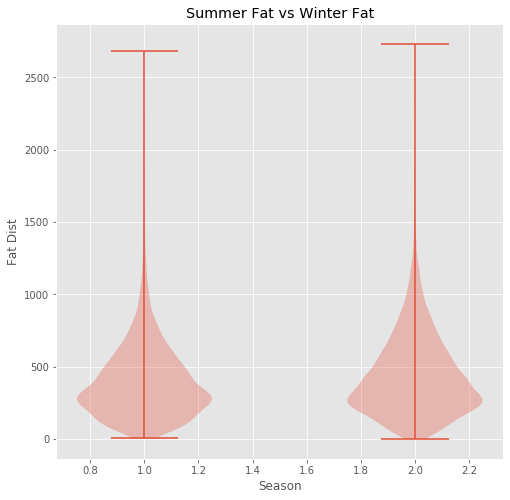

In [986]:
fig, axes = plt.subplots(figsize=(8,8))
s1=list(sugary1['Calories'].dropna())
s2=list(sugarn1['Calories'].dropna())
axes.violinplot(dataset = [s1,s2])
axes.set_title('Summer Fat vs Winter Fat')

axes.yaxis.grid(True)
axes.set_xlabel('Season')
axes.set_ylabel('Fat Dist')

plt.show()

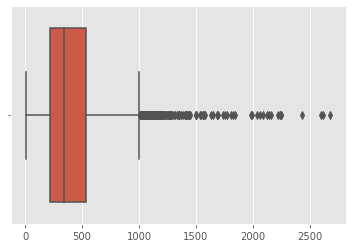

In [987]:
sns.boxplot(x=s1)

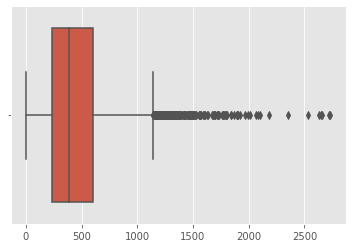

In [988]:
sns.boxplot(x=s2)

In [ ]:
H0(Null Hypothesis) = sugar has higher fat content than sugarless
H1(Alternative Hypothesis) = suglarless has higher fat content than sugar

In [774]:
res = stats.mannwhitneyu(sugarn['Fat_val'], sugary['Fat_val'], alternative="greater")
print("p-value for Sugarless fat > Sugar fat: {:2.800f}".format(res.pvalue))

p-value for Sugarless fat > Sugar fat: 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000223172926484404807747988301580109989611904941288343738871209563894808200064831834569796224811315597024770208451745952392027002871835357873428825373392665819402769597200341675214855014249928158531609484024284028293107895533401389860433986730358865441942173291067774698603898286819458007812500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [ ]:
H0(Null Hypothesis) = sugar has higher salt than sugarless
H1(Alternative Hypothesis) = sugarless has higher salt than sugar

In [777]:
# res = stats.mannwhitneyu(sugarn['Sod_val'], sugary['Sod_val'], alternative="greater")
# print("p-value for Sugar > Sugarless: {:2.8000f}".format(res.pvalue))

In [ ]:
H0(Null Hypothesis) = sugarless reviews are higher than sugar
H1(Alternative Hypothesis) = sugar reviews are higher than sugarless

In [771]:
res = stats.mannwhitneyu(sugary1['Rating'], sugarn1['Rating'], alternative="greater")
print("p-value for Sugar rating > Sugarless rating: {:2.30f}".format(res.pvalue))

p-value for Sugar > Sugarless: 0.000000064406709362172910444877


In [ ]:
reject null

In [717]:
#data cleaning
def get_val(x):
    return str(x).split(' ')[0]
# def get_perc(x):
#     return str(x.split(' ')[1])[2:-2]

colz = ['Carbohydrates', 'Cholesterol', 'Fat', 'Fiber', 'Protein',
       'Saturated Fat', 'Sodium']
valcolz = [x[:3] + '_val' for x in colz]
percolz = [x[:3] + '_perc' for x in colz]

for i,x in enumerate(colz):
    sugar_yes[valcolz[i]] = sugar_yes[x].dropna().apply(get_val)
#     rn[percolz[i]] = rn[x].dropna().apply(get_perc)
    
for i,x in enumerate(colz):
    sugar_no[valcolz[i]] = sugar_no[x].dropna().apply(get_val)
#     rna[percolz[i]] = rna[x].dropna().apply(get_perc)


sugar_no['Make_Again#'] = sugar_no['Make_Again'].apply(lambda x: x.strip('%'))
sugar_yes['Make_Again#'] = sugar_yes['Make_Again'].apply(lambda x: x.strip('%'))


/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/esotewic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [664]:
all_nutritions.shape

(33102, 12)

In [521]:
all_nutritions.sort_values('Fat_val', ascending=False).head(5)

,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
11934,16486.0,79,3.5,16,26.0,3192.0,1528.0,9.0,612.0,663.0,2492.0,44.24
25780,13289.0,75,3.0,4,83.0,629.0,1419.0,1.0,104.0,111.0,3232.0,9.00
6562,11414.0,96,3.5,29,83.0,2128.0,1032.0,16.0,426.0,443.0,2087.0,97.44
5527,11099.0,97,3.5,34,29.0,2128.0,1024.0,3.0,407.0,443.0,1430.0,115.43
277,11016.0,93,3.5,174,18.0,2128.0,1023.0,4.0,408.0,442.0,2156.0,566.37


In [849]:


def find_toofat(x):
    if x['Calories']<2800 and x['Fat_val']<93: return True
    return False
         
mask = summer_nutritions.apply(find_toofat,axis=1)
#print(mask)

summer_nutritions = summer_nutritions[mask]


mask = winter_nutritions.apply(find_toofat,axis=1)
#print(mask)

winter_nutritions = winter_nutritions[mask]
winter_nutritions.shape

(3775, 12)

In [851]:
print(summer_nutritions.shape)
summer_nutritions.sort_values('Fat_val', ascending=False).head(5)

(4724, 12)


,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
7120,1055.0,85,3.5,27,14.0,173.0,92.0,2.0,34.0,37.0,423.0,80.325
6490,1232.0,81,4.0,29,4.0,362.0,92.0,0.0,88.0,32.0,336.0,93.960
14729,1355.0,78,3.5,12,32.0,355.0,92.0,1.0,90.0,32.0,1797.0,32.760
15276,1040.0,80,3.5,11,22.0,168.0,91.0,4.0,33.0,35.0,126.0,30.800
304,1180.0,89,3.5,168,16.0,426.0,91.0,2.0,73.0,21.0,2693.0,523.320


In [523]:
print(summer_nutritions.shape)
summer_nutritions.sort_values('Fat_val', ascending=False).head(5)

(6550, 12)


,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
11462,14647.0,81,3.5,16,1451.0,3848.0,926.0,37.0,176.0,516.0,7832.0,45.36
23606,7595.0,100,3.0,5,517.0,1046.0,608.0,39.0,134.0,282.0,1745.0,15.00
12766,7879.0,71,3.0,14,710.0,2230.0,559.0,58.0,80.0,334.0,4876.0,29.82
4439,5553.0,89,3.5,40,12.0,1064.0,515.0,2.0,205.0,222.0,1861.0,124.60
21707,5513.0,25,2.0,6,1.0,1472.0,428.0,1.0,387.0,207.0,1803.0,3.00


In [850]:
print(winter_nutritions.shape)
winter_nutritions.sort_values('Fat_val', ascending=False).head(5)

(3775, 12)


,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
360,1150.0,95,3.5,154,9.0,376.0,92.0,2.0,68.0,39.0,245.0,512.05
772,1361.0,82,3.0,110,7.0,434.0,92.0,3.0,127.0,39.0,653.0,270.60
5925,1177.0,71,3.5,32,50.0,190.0,91.0,7.0,40.0,39.0,761.0,79.52
16600,1167.0,100,3.5,10,47.0,176.0,91.0,10.0,33.0,30.0,854.0,35.00
18130,1124.0,88,3.5,8,59.0,120.0,91.0,9.0,21.0,8.0,1212.0,24.64


In [614]:
print(winter_nutritions.shape)
winter_nutritions.sort_values('Fat_val', ascending=False).head(5)

(4930, 12)


,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
11934,16486.0,79,3.5,16,26.0,3192.0,1528.0,9.0,612.0,663.0,2492.0,44.24
6562,11414.0,96,3.5,29,83.0,2128.0,1032.0,16.0,426.0,443.0,2087.0,97.44
5527,11099.0,97,3.5,34,29.0,2128.0,1024.0,3.0,407.0,443.0,1430.0,115.43
277,11016.0,93,3.5,174,18.0,2128.0,1023.0,4.0,408.0,442.0,2156.0,566.37
21901,5760.0,83,3.0,6,246.0,671.0,483.0,21.0,122.0,80.0,4881.0,14.94


In [140]:
winter_nutritions.reset_index().head()

,index,Calories,Make_Again#,Rating,Reviews,Car_val,Cho_val,Fat_val,Fib_val,Pro_val,Sat_val,Sod_val,score
0,5,286.0,96,4.0,484,55.0,35.0,7.0,2.0,4.0,4.0,240.0,1858.560
1,6,3400.0,91,3.5,481,485.0,616.0,157.0,20.0,44.0,86.0,2373.0,1531.985
2,8,283.0,90,3.5,446,33.0,35.0,13.0,2.0,11.0,8.0,535.0,1404.900
3,9,791.0,95,4.0,443,13.0,221.0,57.0,2.0,51.0,23.0,697.0,1683.400
4,12,851.0,95,3.5,424,45.0,178.0,55.0,5.0,46.0,27.0,1384.0,1409.800


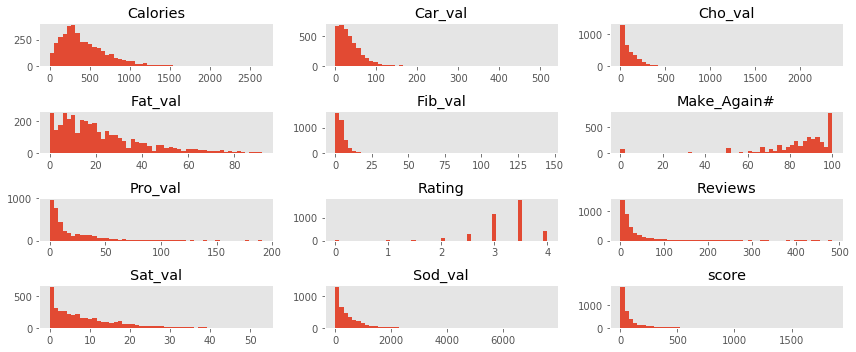

In [854]:
winter_nutritions.hist(figsize=(12, 5), grid=False, bins = 50)
plt.tight_layout()

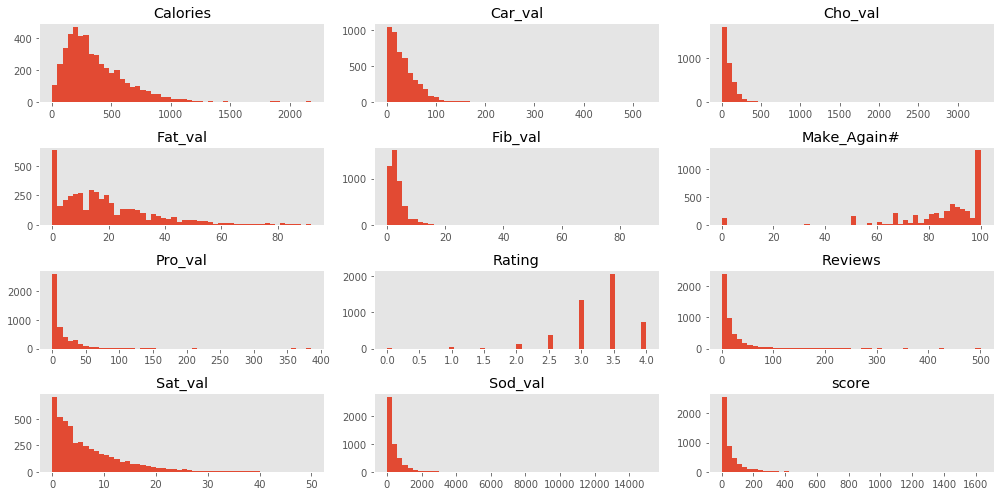

In [855]:
summer_nutritions.hist(figsize=(14, 7), grid=False, bins = 50)
plt.tight_layout()

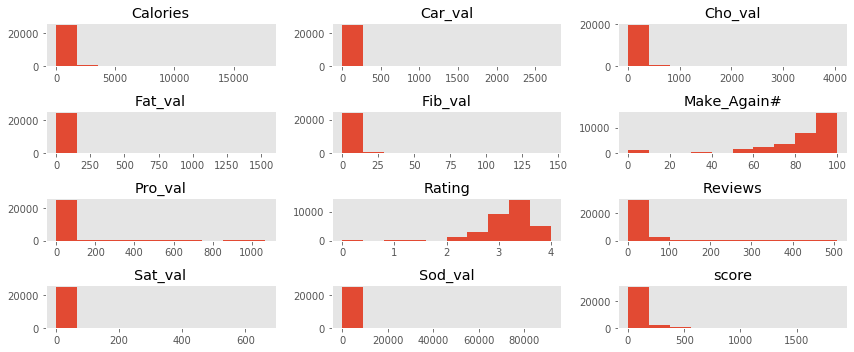

In [408]:
all_nutrition.hist(figsize=(12, 5), grid=False)
plt.tight_layout()

In [748]:
all_nutritions_no_fat

allfatnofat=all_nutritions_no_fat['Fat_val'].dropna()
print(np.percentile(allfatnofat,99))
print(np.percentile(allfatnofat,1))

80.0
0.0


In [747]:
allfat=all_nutritions['Fat_val'].dropna()
print(np.percentile(allfat,99))
print(np.percentile(allfat,1))

192.0600000000013
0.0


In [856]:
winterfat=winter_nutritions['Fat_val'].dropna()
print(np.percentile(winterratings,99))
print(np.percentile(winterratings,1))

190.30000000000018
0.0


In [857]:
summerfat=summer_nutritions['Fat_val'].dropna()
print(np.percentile(summerratings,99))
print(np.percentile(summerratings,1))

137.73999999999978
0.0


In [622]:
# allmakeagain=all_nutrition['Make_Again#'].dropna()
# print(np.percentile(allmakeagain,99))
# print(np.percentile(allmakeagain,1))
# sns.kdeplot(allmakeagain,
#         shade=False, shade_lowest=False)

In [858]:
# winter_nutritions.dropna(winter_nutritions['Fat_val'], axis = 1)
# winter_nutritions['Fat_val'].dropna()
# winterfat = winter_nutritions['Fat_val'].dropna()
# winterfat.filter(lambda x: 0<x<190.3)

# np.percentile(winterfat,99)
# np.percentile(winterfat,1)
all_nutritions_no_fat
afnf = allfatnofat[allfatnofat<80]
af = allfat[allfat<192]
wf = winterfat[winterfat<190]
sf = summerfat[summerfat<137]

In [623]:
sf.describe()

count    4681.000000
mean       19.184576
std        16.455044
min         0.000000
25%         7.000000
50%        15.000000
75%        28.000000
max        80.000000
Name: Fat_val, dtype: float64

In [624]:
wf.describe()

count    3817.000000
mean       23.384857
std        20.248364
min         0.000000
25%         9.000000
50%        18.000000
75%        32.000000
max       105.000000
Name: Fat_val, dtype: float64

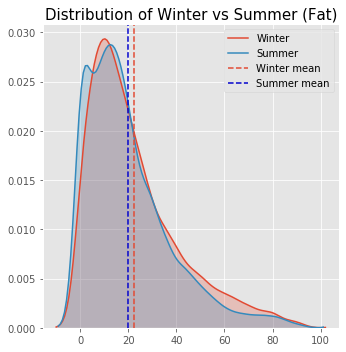

In [1015]:
fig,axs = plt.subplots(figsize=(5,5))
sns.kdeplot(wf, shade=True, shade_lowest=False, label='Winter')
sns.kdeplot(sf, shade=True, shade_lowest=False, label='Summer')
plt.axvline(np.mean(wf), label= 'Winter mean', linestyle= '--')
plt.axvline(np.mean(sf), color = 'mediumblue', label = 'Summer mean', linestyle= '--')
axs.set_title("Distribution of Winter vs Summer (Fat)",fontsize=15)
# axs.set_xlabel('Fat Value',fontsize=20)
# axs.set_ylabel('Distribution',fontsize=15)
plt.legend()
fig.tight_layout()

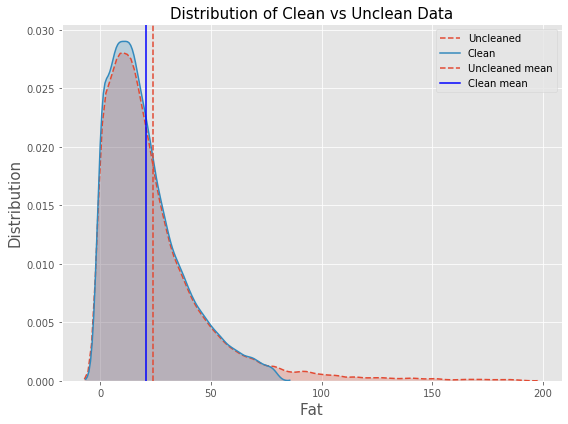

In [1023]:
fig,axs = plt.subplots(figsize=(8,6))
sns.kdeplot(af, shade=True, shade_lowest=False, label='Uncleaned', linestyle='--')
sns.kdeplot(afnf, shade=True, shade_lowest=False, label='Clean')
plt.axvline(np.mean(af), label= 'Uncleaned mean', linestyle= '--')
plt.axvline(np.mean(afnf), color = 'b', label = 'Clean mean')
axs.set_title("Distribution of Clean vs Unclean Data",fontsize=15)
axs.set_xlabel('Fat',fontsize=15)
axs.set_ylabel('Distribution',fontsize=15)
plt.legend(fontsize=10)
fig.tight_layout();

Text(0, 0.5, 'Clean')

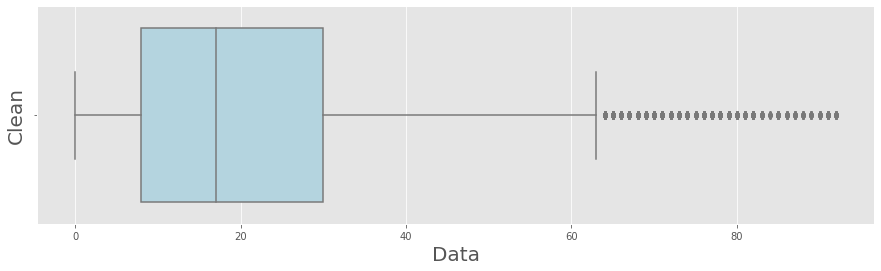

In [928]:
fig,axs=plt.subplots(figsize=(15,4))
# axs[0]=sns.boxplot(x=all_nutritions['Fat_val'].dropna())
# sns.boxplot(x=all_nutritions['Fat_val'].dropna())
sns.boxplot(x=all_nutritions_no_fat['Fat_val'].dropna(),color='lightblue');
axs.set_xlabel('Data',fontsize=20)
axs.set_ylabel('Clean',fontsize=20)

# allfat

Text(0.5, 0, 'Data')

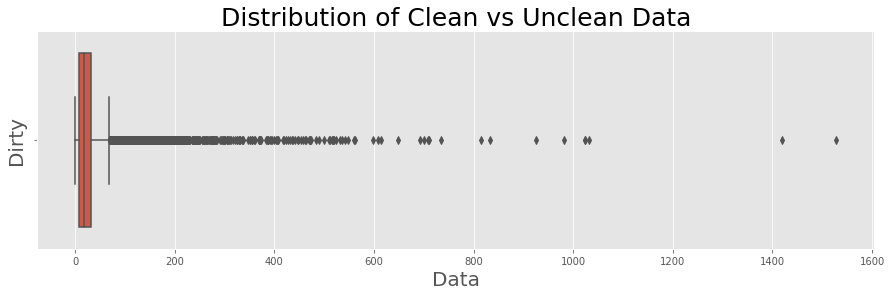

In [926]:
fig,axs=plt.subplots(figsize=(15,4))
axs.set_title("Distribution of Clean vs Unclean Data",fontsize=25)
axs.set_xlabel('Data',fontsize=20)
sns.boxplot(x=all_nutritions['Fat_val'].dropna())
axs.set_ylabel('Dirty',fontsize=20)
axs.set_xlabel('Data',fontsize=20)

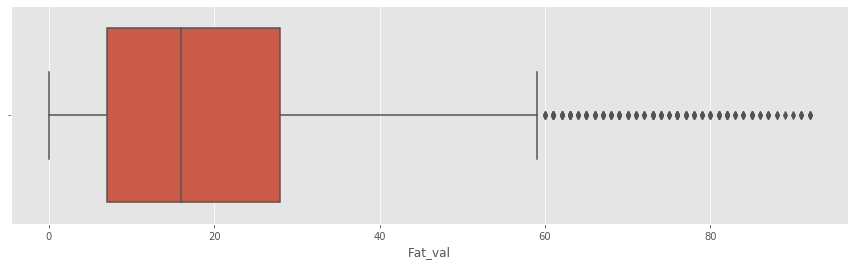

In [908]:
fig,axs=plt.subplots(figsize=(15,4))
sns.boxplot(x=summer_nutritions['Fat_val'].dropna())

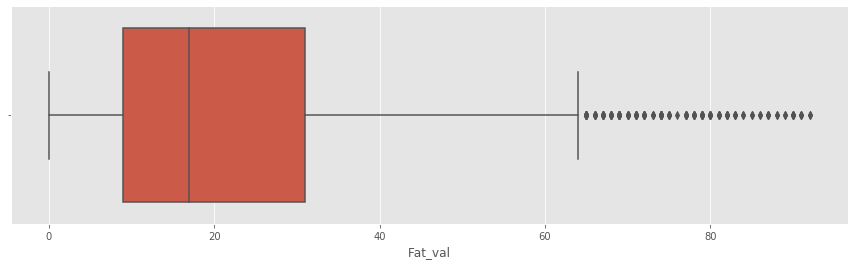

In [909]:
fig,axs=plt.subplots(figsize=(15,4))
sns.boxplot(x=winter_nutritions['Fat_val'].dropna())

In [569]:
def one_dim_scatterplot(data, ax, jitter=0.2, **options):
    if jitter:
        jitter = np.random.uniform(-jitter, jitter, size=data.shape)
    else:
        jitter = np.repeat(0.0, len(data))
    ax.scatter(data, jitter, **options)
    ax.yaxis.set_ticklabels([])
    ax.set_ylim([-1, 1])

In [573]:
print(len(sf))
print(len(wf))

4728
3856


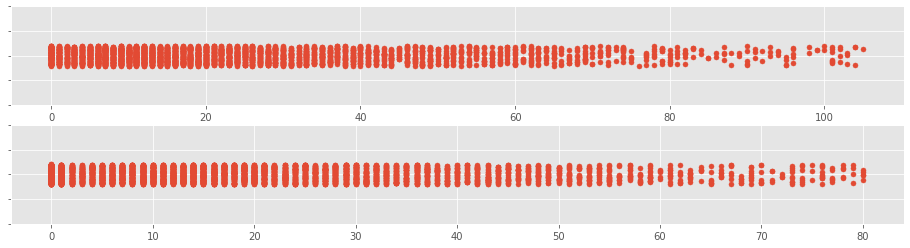

In [646]:
fig, (ax0,ax1) = plt.subplots(2, figsize=(16, 4))
one_dim_scatterplot(wf, ax0, s=25)
one_dim_scatterplot(sf, ax1, s=25)

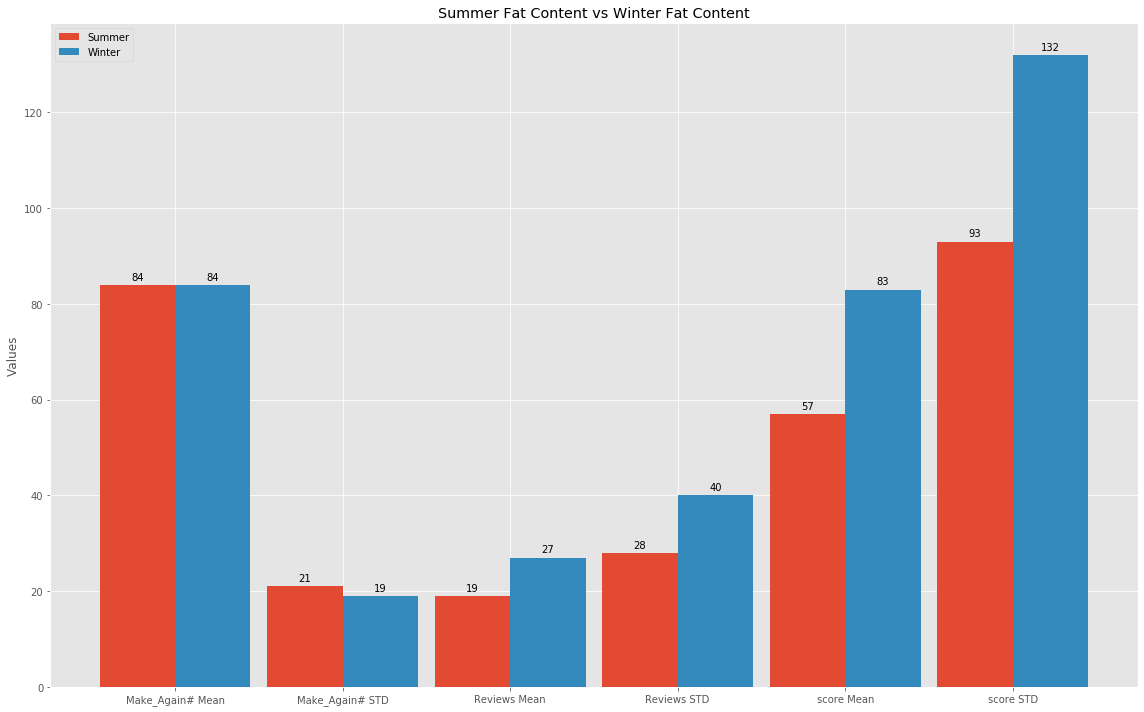

In [402]:
nutrition_list = ['Make_Again#', 'Reviews', 'score']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(summer_nutritions[i].mean()))
        summer_means.append(round(summer_nutritions[i].std()))
        winter_means.append(round(winter_nutritions[i].mean()))
        winter_means.append(round(winter_nutritions[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(16,10))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Summer')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Winter')

    ax.set_ylabel('Values')
    ax.set_title('Summer Fat Content vs Winter Fat Content')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)

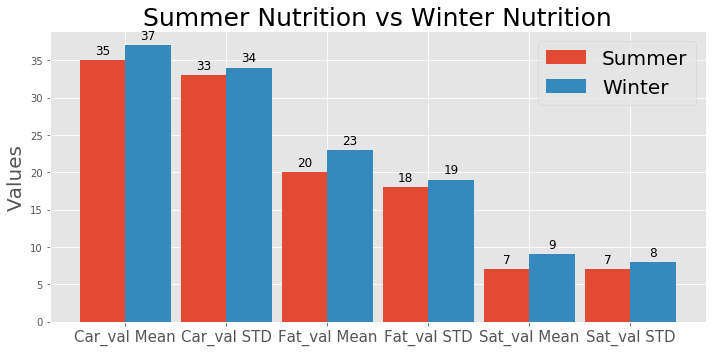

In [995]:
nutrition_list = ['Car_val', 'Fat_val', 'Sat_val']
def nutrition_bar_graph(nutrition_list):
    '''
    Plots nutrition into bar graph
    
    Arr: list of nutrtions
        
    returns: graph of mean and std comparison'''
    labels = []
    summer_means = []
    winter_means = []
    for i in nutrition_list:
        labels.append(i + ' Mean')
        labels.append(i + ' STD')
        summer_means.append(round(summer_nutritions[i].mean()))
        summer_means.append(round(summer_nutritions[i].std()))
        winter_means.append(round(winter_nutritions[i].mean()))
        winter_means.append(round(winter_nutritions[i].std()))
        
    x = np.arange(len(labels))
    width = .45

    fig,ax=plt.subplots(figsize=(10,5))
    rects1 = ax.bar(x - width/2, summer_means, width, label='Summer')
    rects2 = ax.bar(x + width/2, winter_means, width, label='Winter')

    ax.set_ylabel('Values',fontsize=20)
    ax.set_title('Summer Nutrition vs Winter Nutrition',fontsize=25)
    ax.set_xticks(x)
    ax.set_xticklabels(labels,fontsize=15)
    ax.legend(fontsize=20)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,3),
                       textcoords = 'offset points',
                       ha='center', va='bottom',fontsize=12)

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

nutrition_bar_graph(nutrition_list)

In [205]:
# distribution?


In [933]:
winter_sample = []
for i,v in enumerate(winter_nutritions['Fat_val']):
    if v % 1 != 0:
        continue
    else:
        winter_sample.append(v)
        if len(winter_sample) == 3000:
            break

        
summer_sample = []
for i,v in enumerate(summer_nutritions['Fat_val']):
    if v % 1 != 0:
        continue
    else:
        summer_sample.append(v)
        if len(summer_sample) == 3000:
            break
        
# summer_sample

In [200]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [202]:
test_statistic = welch_test_statistic(summer_sample, winter_sample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))


Welch Test Statistic: -5.23


[Text(0, 0, 'Winter'), Text(0, 0, 'Summer')]

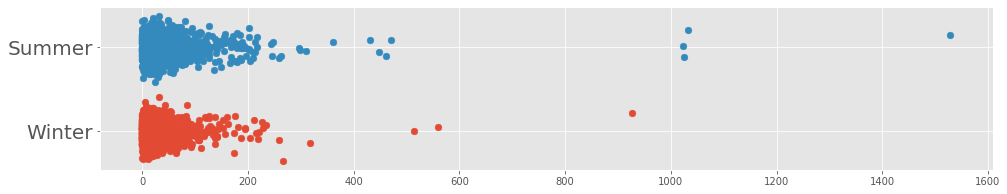

In [824]:
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(summer_sample, np.repeat(0, len(summer_sample)) + np.random.normal(0, 0.1, len(summer_sample)), s=45)
ax.scatter(winter_sample, np.repeat(1, len(winter_sample)) + np.random.normal(0, 0.1, len(summer_sample)), s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["Winter", "Summer"],fontsize=20)


In [253]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

In [254]:
winter_wins = count_winning_pairs(winter_sample, summer_sample)
summer_wins = count_winning_pairs(summer_sample, winter_sample)
print("Number of Winter Wins: {}".format(winter_wins))
print("Number of Summer Wins: {}".format(summer_wins))

Number of Winter Wins: 61.5
Number of Summer Wins: 563.5


In [651]:
print("Total Number of Wins: {}".format(winter_wins + summer_wins))
print("Total Number of Comparisons: {}".format(len(winter_sample)*len(summer_sample)))

Total Number of Wins: 625.0
Total Number of Comparisons: 9000000


H0(Null Hypothesis) = summer is higher than winter
H1(Alternative Hypothesis) = Winter is higher than summer

In [934]:
res = stats.mannwhitneyu(winter_sample, summer_sample, alternative="greater")
print("p-value for Winter > Summer: {:2.30f}".format(res.pvalue))

p-value for Winter > Summer: 0.000398365969076911732513202047


In [ ]:
We have to reject the Null Hypothesis

In [832]:
type(summer_sample)

list

In [983]:
type(summer_sample)

list

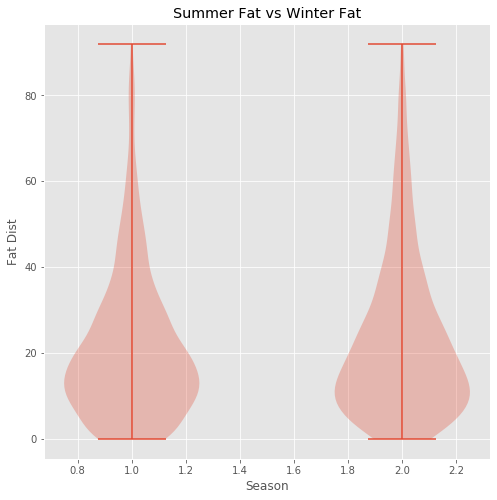

In [866]:
fig, axes = plt.subplots(figsize=(8,8))

axes.violinplot(dataset = [summer_sample,winter_sample])
axes.set_title('Summer Fat vs Winter Fat')

axes.yaxis.grid(True)
axes.set_xlabel('Season')
axes.set_ylabel('Fat Dist')

plt.show()

In [970]:
df = winter_nutritions.groupby('Rating').mean()['Calories']

Rating
0.0    401.500000
1.0    371.652174
1.5    303.416667
2.0    345.653465
2.5    389.190000
3.0    406.898261
3.5    450.363068
4.0    392.982801
Name: Calories, dtype: float64

In [974]:
sns.boxplot(x="Rating", y="Calories", data = df)

ValueError: Could not interpret input 'Rating'